In [1]:
from __future__ import print_function

import numpy as np 
import pandas as pd
import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
data=pd.read_csv("data/Pokemon.csv")
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


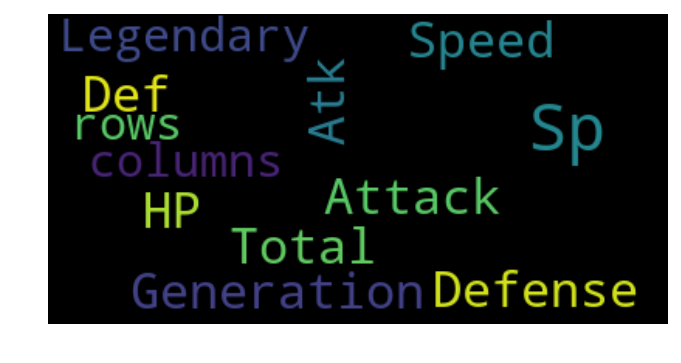

In [14]:
wordcloud = WordCloud(max_font_size=42).generate(str(data))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [4]:
data.drop(["#","Name","Type 1","Type 2"],axis=1,inplace=True)
data.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,False
1,405,60,62,63,80,80,60,1,False
2,525,80,82,83,100,100,80,1,False
3,625,80,100,123,122,120,80,1,False
4,309,39,52,43,60,50,65,1,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8)
memory usage: 50.9 KB


In [6]:
profile = pandas_profiling.ProfileReport(data)
profile

Number of variables,9
Number of observations,800
Total Missing (%),0.0%
Total size in memory,50.9 KiB
Average record size in memory,65.1 B
Numeric,8
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [7]:
data.Legendary=[1 if each==True else 0 for each in data.Legendary]

In [8]:
y=data.Legendary.values 
x_data=data.drop(["Legendary"],axis=1)
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [9]:
data.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


### KNeighborsClassifier

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
alg_acc={}
scores=[]
for each in range(1,10):
    knn_t=KNeighborsClassifier(n_neighbors=each)
    knn_t.fit(x_train,y_train)
    scores.append(knn_t.score(x_test,y_test))

knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
print("accuracy is",knn.score(x_test,y_test))
alg_acc["knn"]=knn.score(x_test,y_test)


accuracy is 0.9625


In [12]:
np.count_nonzero(y_train)

55

### RandomForest

In [13]:
scores2=[]
for each in range(100,1000,100):
    rf_t=RandomForestClassifier(n_estimators=each,random_state=42)
    rf_t.fit(x_train,y_train)
    scores2.append(rf_t.score(x_test,y_test))

rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
alg_acc["rf"]=rf.score(x_test,y_test)
print("Random Forest test accuracy is:",rf.score(x_test,y_test))

Random Forest test accuracy is: 0.9625
